Lets preprocess the Dataset

In [1]:
import pandas as pd

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']


user_logs = pd.read_csv('user1_log.txt', sep='|', header=None, names=columns)


user_logs['Time'] = user_logs['Time'].str.replace(' a.m.', '', regex=False).str.replace(' p.m.', '', regex=False)


user_logs['Timestamp'] = pd.to_datetime(
    user_logs['Date'] + ' ' + user_logs['Time'], 
    format='%d/%m/%Y %H:%M:%S',  
    errors='coerce'  
)

user_logs.drop(['Date', 'Time'], axis=1, inplace=True)

user_logs['Label'] = 0
user_logs.to_csv('User_log_in_csv_format.csv', index=False)

print(user_logs.head())


   ID  Session_ID  Depth       Path  Label           Timestamp
0   0    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
1   1    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
2   2    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
3   3    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04
4   4    35396524      4  0\1\2\3\4      0 2012-02-14 10:22:04


Create a Graph Representations
- In this the Node will represent the directories/file accessed(0,1,2,etc)
- Edges: Represents the transition between the nodes

Attributes:
- Frequency
- Depth
- TimeStamps

In [2]:
import networkx as nx
G = nx.DiGraph()
    
for _, row in user_logs.iterrows():
    path_nodes = row['Path'].split('\\') 
    for i in range(len(path_nodes) - 1):
        src = path_nodes[i]
        dst = path_nodes[i + 1]
        if G.has_edge(src, dst):
            G[src][dst]['frequency'] += 1
        else:
            G.add_edge(src, dst, frequency=1, depth=row['Depth'], timestamp=row['Timestamp'])

Visualization of the Graph

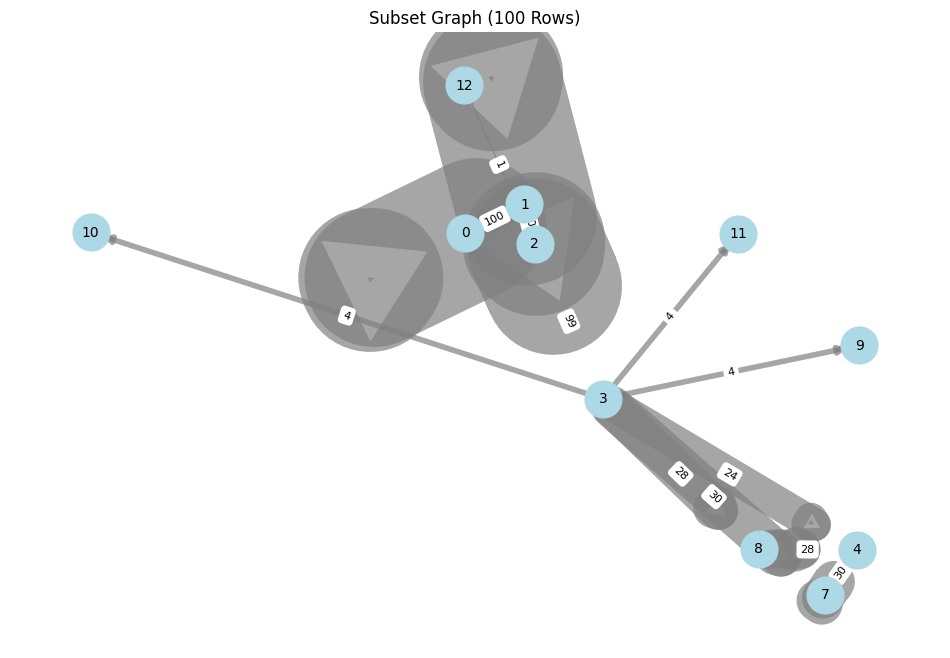

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def construct_graph(df):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        path_nodes = row['Path'].split('\\') 
        for i in range(len(path_nodes) - 1):
            src = path_nodes[i]
            dst = path_nodes[i + 1]
            if G.has_edge(src, dst):
                G[src][dst]['frequency'] += 1
            else:
                G.add_edge(src, dst, frequency=1, depth=row['Depth'], timestamp=row['Timestamp'])
    return G

def visualize_graph(G, title="Graph Visualization"):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
    edge_widths = [G[u][v]['frequency'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    edge_labels = {(u, v): G[u][v]['frequency'] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title(title)
    plt.axis("off")
    plt.show()

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']
user_logs = pd.read_csv('user1_log.txt', sep='|', header=None, names=columns)

user_logs['Time'] = user_logs['Time'].str.replace('.', '', regex=False)
user_logs['Timestamp'] = pd.to_datetime(user_logs['Date'] + ' ' + user_logs['Time'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')

subset_logs = user_logs.head(100)

subset_graph = construct_graph(subset_logs)

visualize_graph(subset_graph, title="Subset Graph (100 Rows)")


Now lets try to preprocess in the similar way we have worked. 
In this dataset, I am going to consider each directory movement as a node

Node : Represents an individual directory or file

Edge : Represents the transition or movement between two consectuive directories in the path.

In [5]:
import pandas as pd

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']
data = pd.read_csv("user1_log.txt", sep = '|', header = None, names = columns)

data

# Label will be assigned later as 0

,ID,Date,Time,Session_ID,Depth,Path,Label
0,0,14/02/2012,10:22:04 a.m.,35396524,4,0\1\2\3\4,NaN
1,1,14/02/2012,10:22:04 a.m.,35396524,4,0\1\2\3\4,NaN
2,2,14/02/2012,10:22:04 a.m.,35396524,4,0\1\2\3\4,NaN
3,3,14/02/2012,10:22:04 a.m.,35396524,4,0\1\2\3\4,NaN
4,4,14/02/2012,10:22:04 a.m.,35396524,4,0\1\2\3\4,NaN
...,...,...,...,...,...,...,...
274047,274047,14/04/2012,21:46:14 p.m.,40617974,3,0\1\2\3,NaN
274048,274048,14/04/2012,21:46:14 p.m.,40617974,3,0\1\2\3,NaN
274049,274049,14/04/2012,21:46:14 p.m.,40617974,4,0\1\2\3\7632,NaN
274050,274050,14/04/2012,21:46:14 p.m.,40617974,4,0\1\2\3\157,NaN


Currently, the dataset is in 24 hour format, but also has am/pm at the end. 

In [6]:
data['Time'] = data['Time'].str.replace(' a.m.', '', regex=False)
data['Time'] = data['Time'].str.replace(' p.m.', '', regex=False)

data

,ID,Date,Time,Session_ID,Depth,Path,Label
0,0,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN
1,1,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN
2,2,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN
3,3,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN
4,4,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN
...,...,...,...,...,...,...,...
274047,274047,14/04/2012,21:46:14,40617974,3,0\1\2\3,NaN
274048,274048,14/04/2012,21:46:14,40617974,3,0\1\2\3,NaN
274049,274049,14/04/2012,21:46:14,40617974,4,0\1\2\3\7632,NaN
274050,274050,14/04/2012,21:46:14,40617974,4,0\1\2\3\157,NaN


In [7]:
data['Timestamp'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'], 
    format='%d/%m/%Y %H:%M:%S', 
    errors='coerce' 
)

data

,ID,Date,Time,Session_ID,Depth,Path,Label,Timestamp
0,0,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
1,1,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
2,2,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
3,3,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
4,4,14/02/2012,10:22:04,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
...,...,...,...,...,...,...,...,...
274047,274047,14/04/2012,21:46:14,40617974,3,0\1\2\3,NaN,2012-04-14 21:46:14
274048,274048,14/04/2012,21:46:14,40617974,3,0\1\2\3,NaN,2012-04-14 21:46:14
274049,274049,14/04/2012,21:46:14,40617974,4,0\1\2\3\7632,NaN,2012-04-14 21:46:14
274050,274050,14/04/2012,21:46:14,40617974,4,0\1\2\3\157,NaN,2012-04-14 21:46:14


In [8]:
data.drop(['Date', 'Time'], axis = 1, inplace=True)
data

,ID,Session_ID,Depth,Path,Label,Timestamp
0,0,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
1,1,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
2,2,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
3,3,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
4,4,35396524,4,0\1\2\3\4,NaN,2012-02-14 10:22:04
...,...,...,...,...,...,...
274047,274047,40617974,3,0\1\2\3,NaN,2012-04-14 21:46:14
274048,274048,40617974,3,0\1\2\3,NaN,2012-04-14 21:46:14
274049,274049,40617974,4,0\1\2\3\7632,NaN,2012-04-14 21:46:14
274050,274050,40617974,4,0\1\2\3\157,NaN,2012-04-14 21:46:14


In [9]:
edges = []
for _, row in data.iterrows():
    path_nodes = row['Path'].split('\\')
    for i in range(len(path_nodes) - 1):
        edges.append({
            'src': path_nodes[i],
            'dest': path_nodes[i+1],
            'time' : row['Timestamp'],
            'label': 0
        })

edges

[{'src': '0',
  'dest': '1',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '1',
  'dest': '2',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '2',
  'dest': '3',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '3',
  'dest': '4',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '0',
  'dest': '1',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '1',
  'dest': '2',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '2',
  'dest': '3',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '3',
  'dest': '4',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '0',
  'dest': '1',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '1',
  'dest': '2',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '2',
  'dest': '3',
  'time': Timestamp('2012-02-14 10:22:04'),
  'label': 0},
 {'src': '3',
  'dest': '4',
  '

In [10]:
edges_df = pd.DataFrame(edges)
edges_df.to_csv('wuil_dataset_for_darpa_format.csv', index = False)
print(edges_df.head())

  src dest                time  label
0   0    1 2012-02-14 10:22:04      0
1   1    2 2012-02-14 10:22:04      0
2   2    3 2012-02-14 10:22:04      0
3   3    4 2012-02-14 10:22:04      0
4   0    1 2012-02-14 10:22:04      0


In [11]:
edges_df.sort_values(['time'], ascending= True)

,src,dest,time,label
0,0,1,2012-02-14 10:22:04,0
23,3,4,2012-02-14 10:22:04,0
22,2,3,2012-02-14 10:22:04,0
21,1,2,2012-02-14 10:22:04,0
19,3,4,2012-02-14 10:22:04,0
...,...,...,...,...
1410751,3,14,2012-04-14 21:47:03,0
1410748,0,1,2012-04-14 21:47:03,0
1410749,1,2,2012-04-14 21:47:03,0
1410750,2,3,2012-04-14 21:47:03,0


In [18]:
import pandas as pd

columns = ['ID', 'Date', 'Time', 'Session_ID', 'Depth', 'Path', 'Label']

data = pd.read_csv('user1_log.txt', sep='|', header=None, names=columns)

data['Time'] = data['Time'].str.replace(' a.m.', '', regex=False)
data['Time'] = data['Time'].str.replace(' p.m.', '', regex=False)

data['Timestamp'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'], 
    format='%d/%m/%Y %H:%M:%S', 
    errors='coerce'
)

data.drop(['Date', 'Time'], axis=1, inplace=True)

data = data.sort_values(by='Timestamp').reset_index(drop=True)

current_time = 0
prev_timestamp = None
time_mapping = []

for timestamp in data['Timestamp']:
    if timestamp != prev_timestamp:  
        current_time += 1
        prev_timestamp = timestamp
    time_mapping.append(current_time)

data['Sequential_Time'] = time_mapping  

edges = []
for _, row in data.iterrows():
    path_nodes = row['Path'].split('\\')  
    for i in range(len(path_nodes) - 1):
        edges.append({
            'src_ip': path_nodes[i],           # Source node
            'dest_ip': path_nodes[i + 1],      # Destination node
            'time': row['Sequential_Time'],    # Sequential time
            'label': 0            # Label
        })

edges_df = pd.DataFrame(edges)

edges_df.to_csv('sequential_time_wuil_dataset.csv', index=False)

print(edges_df.head())


  src_ip dest_ip  time  label
0      0       1     1      0
1      1       2     1      0
2      2       3     1      0
3      3       4     1      0
4      0       1     1      0
